# 검색과 정렬
- 머신러닝에서의 쓰임(많지는 않으나)
    - 시간 복잡도 계산 
    - 공간  복잡도 계산 
    - 시간/공간의 트레이드오프  
  - 머신러닝 파이프라인에 적용
    - 데이터 캡쳐
    - 전처리
    - 데이터 훈련
    - 모델 개시

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import warnings
warnings.filterwarnings(action='ignore')

# 4.1 이분 검색

In [3]:
b = np.array([np.random.randint(0, 151) for integer in range(9)])
b   # 미정렬 어레이

array([ 53, 129,  26,  84, 134,  45, 139,  37, 124])

일반적인 상황에서 특정 값(예: 123)을 검색하는 유일한 방법은
- 어레이의 요소를 하나 하나 다 뜯어보는 것.
- = 말하자면 하나하나 interation 해야 함. 

최악의 경우 시간복잡도는 선형의 $O(n)$가 된다. 123의 경우 $O(123)$이 되는 셈.


In [4]:
# 빠른 정렬
b.sort()
b

array([ 26,  37,  45,  53,  84, 124, 129, 134, 139])

**이분 검색** 알고리즘을 이용하면 시간복잡도를 O(log $n$)로 줄일 수 있다. 단, 이분 검색은 데이터가 정렬되어 있음을 전제로 한다. 

    array([ 26,  37,  45,  53,  84, 124, 129, 134, 139])



- 1) 어레이를 절반으로 자른다.
    - 9개의 요소를 가진 어레이에서는 절반이 5번째 숫자가 될 것이다.
    - 위의 예에서는 70이 절반 번째 숫자.
- 2) 찾고자 하는 값이 절반에 위치해 있는 숫자보다 크면 왼쪽 절반에서 숫자를 찾으면 된다. 반대로, 목표 값이 절반 값보다 작으면 오른쪽 절반만 검색하면 된다.
    - `121`을 찾고자 한다면 70을 기준으로 반으로 나눴을 때 왼쪽 어레이 `[75, 116, 121, 133]`를 찾으면 금방 찾을 수 있다 .
- 3) 위의 1)-2)를 반복해서 `절반 번째 값 == 목표 값`이 되면 검색 완료!

각 검색의 회차마다 어레이를 절반으로 쪼개서 2분 검색이다. 

<br/>

----

<br/>

어래이의 요소 갯수를 두 배로 늘리는 작업을 $n$번 해도(요소의 수는 총 $2^n$ 개가 됨), 검색 시 어레이를 절반으로 쪼개면 검색 작업 횟수는 한 번만 늘어난다. 
- 어레이 길이와 검색 횟수는 둘이 다른 작업이다. 헷갈리지 말 것.

> 어레이를 이분(둘로 쪼갬)하는 것을 한 번의 검색으로 한다. 이분 검색 횟수를 수식으로 계산하면 다음과 같다. 

* 요소를 1개만 가지는 어레이 검색 ($= 2^0$)
* 2($= 2^1$): 2~3개 요소의 어레이는 최대 2회
* $n = 4 (= 2^2$): 4~7개 요소의 어레이는 최대 3회
* $n = 8 (= 2^3$): 8~ 15개 요소의 어레이는 최대 4회
* $n = 16 (= 2^4$): 16~31개 요소의 어레이는 최대 5회...

In [5]:
# 요소가 4개 있는 어레이
np.log2(4) + 1          

# +1은 어레이 요소가 1개라도 1번은 무조건 찾아야 하기 때문.

3.0

In [6]:
# 요소가 8개 있는 어레이
np.log2(8) + 1

4.0

In [7]:
# 요소가 16개 있는 어레이
np.log2(16) + 1

5.0

### 이분 검색의 시간 복잡도

In [6]:
binary = np.arange(2, 101, 2)
binary

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

Text(0.5, 1.05, '리스트의 요소를 두 배로 늘릴 때마다\n시간 복잡도는 지수의 속도로 천천히 는다.')

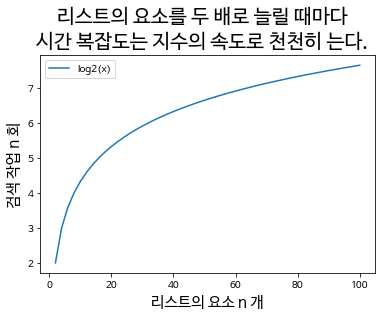

In [7]:
fig, ax = plt.subplots()
ax.plot(binary, np.log2(binary) + 1, label="log2(x)")
ax.set_xlabel("리스트의 요소 n 개", fontsize=15)
ax.set_ylabel("검색 작업 n 회", fontsize=15)
ax.legend()
fig.suptitle("리스트의 요소를 두 배로 늘릴 때마다\n시간 복잡도는 지수의 속도로 천천히 는다.", fontsize=20, y=1.05)
# In time complexity computation, however, we compute the most dominant term only. 

## 리스트의 이분 검색 - 인덱스 값의 조종

- 실은 이분 검색은 그다지 어렵지 않다.
- 인덱스 값을 가지고 노는 게 알고리즘의 전부이다. 

In [8]:
# low, high, midpoint는 서로 다른 인덱스 값에 이름을 준 것이다.
# 인덱스 값에 이름을 주면 그 이름을 통해 리스트의 여기저기로 위치를 옮겨다닐 수 있다.

def binary_search(array, value):
    low = 0               # 인덱스의 첫번째 요소
    high = len(array) - 1 # 인덱스의 마지막 요소

    while low <= high:    # 리스트의 첫 값이 막값보다 작으면
        midpoint = (low + high) // 2  # 리스트의 절반의 인덱스를 찾는다. 2로 나눴을 때의 목을 절반으로 한다.
        if value < array[midpoint]:   # 찾고자 하는 값이 절반 값보다 작으면
            high = midpoint - 1       # 인덱스의 마지막 요소를 절반-1 값으로 옮긴다. 
                                      # (사실 인덱스가 쪼개지는 건 아니다. 그냥 인덱스 위치를 반으로 옮겨놓고 쪼갠 것처럼 여기는 것이다 )
        elif value > array[midpoint]:
            low = midpoint + 1
        else: 
            return midpoint
    return -1

In [16]:
binary_search(b, 139)

8

In [17]:
binary_search(b, 235)   # 없는 수를 찾으면 -1을 반환한다. 

-1

In [18]:
binary_search(binary, 64)

31

In [21]:
def recursive_binary_search(array, value, low, high):  # 재귀적 이분 검색
    if low <= high:
        midpoint = (low + high) // 2

        if array[midpoint] == value:
            return midpoint
        elif array[midpoint] > value:
            return recursive_binary_search(array, value, low, midpoint-1)  # 재귀 함수를 부를 때는
        else:                                                              # 리스트의 절반값을 변수로 준다. 
            return recursive_binary_search(array, value, midpoint+1, high)
    else:
        return -1

In [25]:
recursive_binary_search(b, 138, 0, len(b)-1)

-1

In [23]:
recursive_binary_search(b, 235, 0, len(b)-1)

-1

In [24]:
recursive_binary_search(binary, 82, 0, len(binary)-1)

40

**참고 자료**

- 소스 코드  
[**"Data Structures, Algorithms, and Machine Learning Optimization"**](https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/)